In [17]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
run_path = r"/netfiles/ciroh/floodplainsData/runs/9/run_metadata.json"
with open(run_path, 'r') as f:
    run_dict = json.loads(f.read())

in_path = os.path.join(run_dict['analysis_directory'], 'flood_metrics.csv')
df = pd.read_csv(in_path)

magnitudes = ['Q2', 'Q5', 'Q10', 'Q25', 'Q50', 'Q100', 'Q200', 'Q500']
durations = ['Short', 'Medium', 'Long']
metric_list = ['event_volume', 'event_volume_ch', 'event_volume_edz', 'tw_ch', 'tw_edz', 'tw_sec', 'area_ch', 'area_edz', 'area_sec', 'peak_stage_scaled', 'volume_conservation']



In [19]:
tmp_cols = [f'{magnitude}_Medium_volume_conservation' for magnitude in magnitudes]
conservation = df[tmp_cols]
print(conservation.describe())

       Q2_Medium_volume_conservation  Q5_Medium_volume_conservation  \
count                    2531.000000                    2513.000000   
mean                        0.997854                       0.998528   
std                         0.030027                       0.022328   
min                         0.144363                       0.228547   
25%                         0.999989                       0.999993   
50%                         0.999993                       0.999996   
75%                         0.999997                       0.999998   
max                         1.000000                       1.000000   

       Q10_Medium_volume_conservation  Q25_Medium_volume_conservation  \
count                     2487.000000                     2453.000000   
mean                         0.998823                        0.999108   
std                          0.018619                        0.014929   
min                          0.296423                        0.39293

/data/condaEnvs/floodplains/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/condaEnvs/floodplains/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/condaEnvs/floodplains/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/condaEnvs/floodplains/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

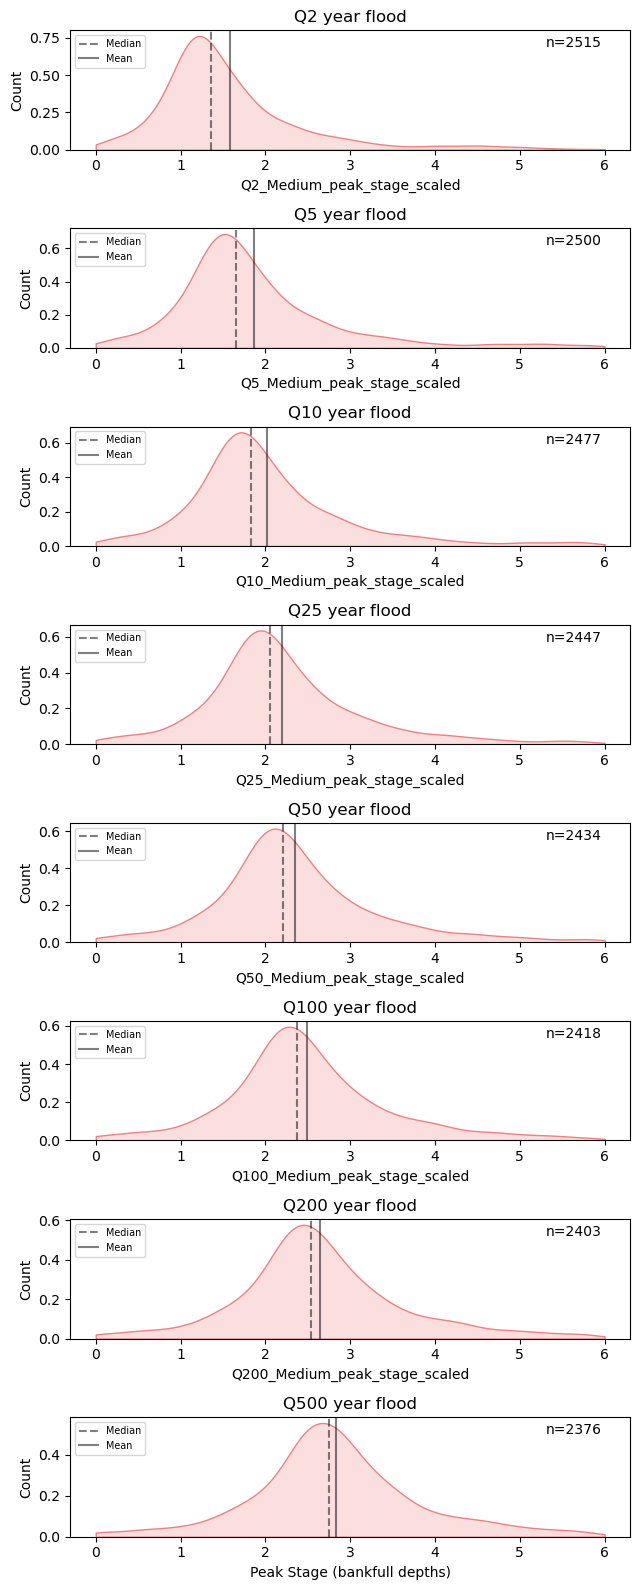

In [20]:
fig, axs = plt.subplots(nrows=len(magnitudes), figsize=(6.5, len(magnitudes)*2))
for i, magnitude in enumerate(magnitudes):
    tmp_df = df[df[f'{magnitude}_Medium_volume_conservation'] > 0.9]
    peak_stages = tmp_df[f'{magnitude}_Medium_peak_stage_scaled']
    sns.kdeplot(peak_stages, ax=axs[i], color='lightcoral', fill=True, linewidth=1, clip=(0, 6))
    axs[i].axvline(peak_stages.median(), color='k', alpha=0.5, linestyle='--', label='Median')
    axs[i].axvline(peak_stages.mean(), color='k', alpha=0.5, linestyle='-', label='Mean')
    # axs[i].hist(peak_stages, bins=50, fc='lightcoral', ec='k', lw=1)
    axs[i].text(0.95, 0.95, f'n={len(tmp_df)}', transform=axs[i].transAxes, ha='right', va='top')
    axs[i].set_title(f'{magnitude} year flood')
    axs[i].set_ylabel('Count')
    axs[i].legend(loc='upper left', fontsize='x-small')
axs[-1].set_xlabel('Peak Stage (bankfull depths)')
fig.tight_layout()
plt.show()

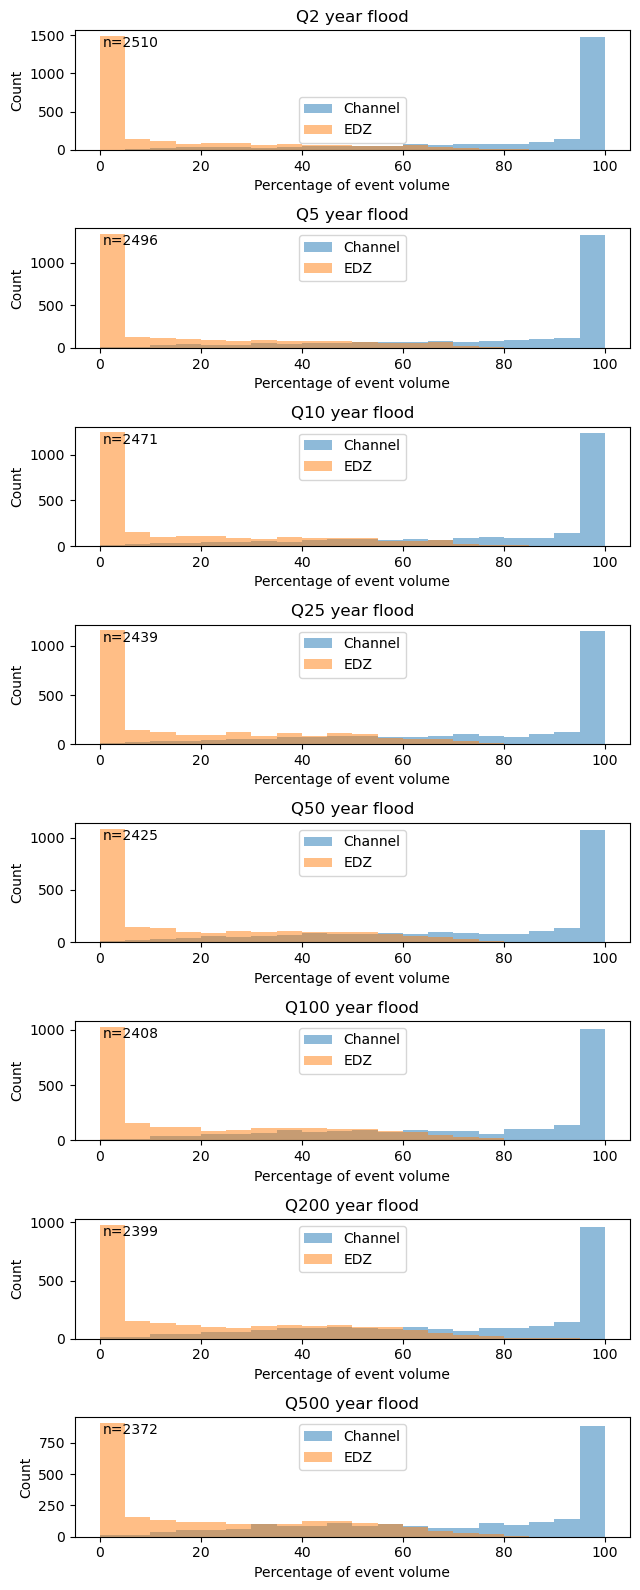

In [21]:
fig, axs = plt.subplots(nrows=len(magnitudes), figsize=(6.5, len(magnitudes)*2))

for i, magnitude in enumerate(magnitudes):
    tmp_df = df[df[f'{magnitude}_Medium_volume_conservation'] > 0.95]
    event_volumes = tmp_df[f'{magnitude}_Medium_event_volume'].values
    event_volume_chs = tmp_df[f'{magnitude}_Medium_event_volume_ch'].values
    event_volume_edzs = tmp_df[f'{magnitude}_Medium_event_volume_edz'].values
    pct_channel = (event_volume_chs / event_volumes) * 100
    pct_edz = (event_volume_edzs / event_volumes) * 100
    axs[i].hist(pct_channel, bins=np.arange(0, 101, 5), alpha=0.5, label='Channel')
    axs[i].hist(pct_edz, bins=np.arange(0, 101, 5), alpha=0.5, label='EDZ')
    axs[i].text(0.05, 0.95, f'n={len(tmp_df)}', transform=axs[i].transAxes, ha='left', va='top')
    axs[i].set_title(f'{magnitude} year flood')
    axs[i].set_xlabel('Percentage of event volume')
    axs[i].set_ylabel('Count')
    axs[i].legend()
fig.tight_layout()
plt.show()


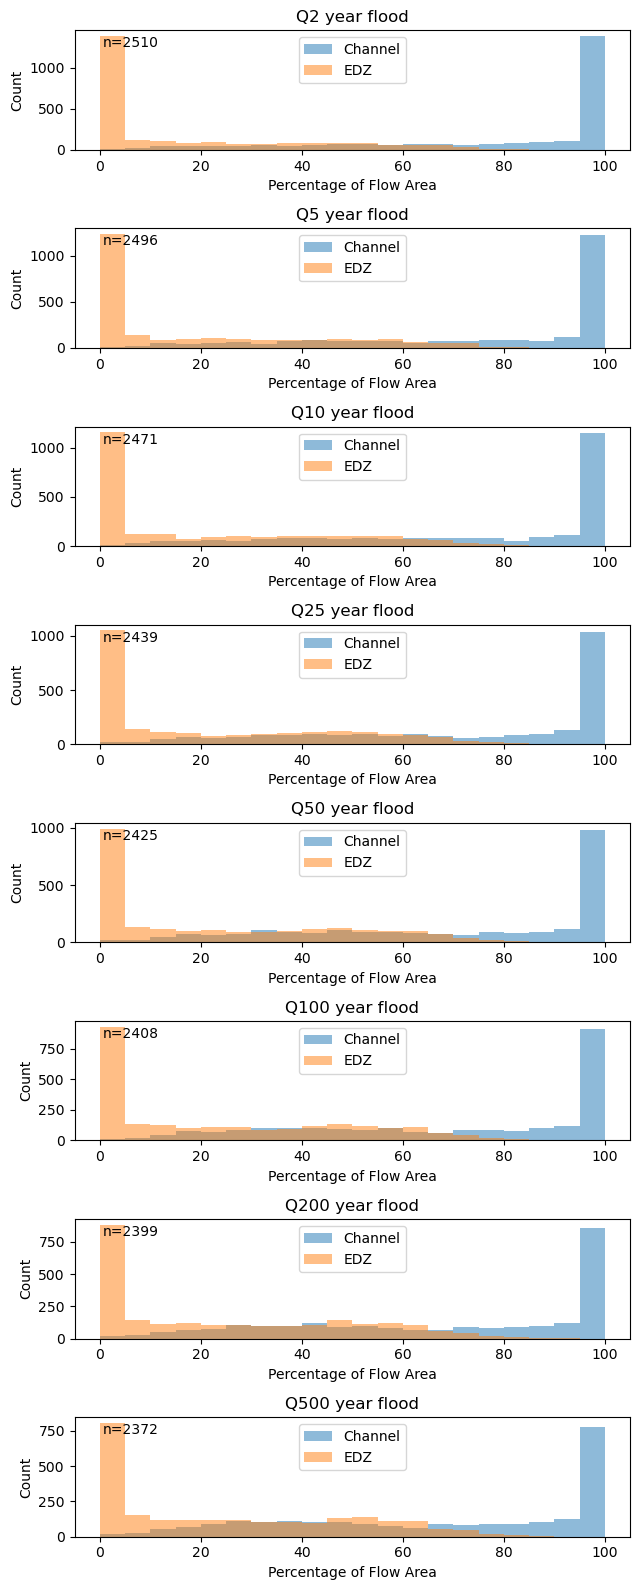

In [22]:
fig, axs = plt.subplots(nrows=len(magnitudes), figsize=(6.5, len(magnitudes)*2))

for i, magnitude in enumerate(magnitudes):
    tmp_df = df[df[f'{magnitude}_Medium_volume_conservation'] > 0.95]
    tw_sec = tmp_df[f'{magnitude}_Medium_area_sec'].values
    tws_ch = tmp_df[f'{magnitude}_Medium_area_ch'].values
    tws_edz = tmp_df[f'{magnitude}_Medium_area_edz'].values
    pct_channel = (tws_ch / tw_sec) * 100
    pct_edz = (tws_edz / tw_sec) * 100
    axs[i].hist(pct_channel, bins=np.arange(0, 101, 5), alpha=0.5, label='Channel')
    axs[i].hist(pct_edz, bins=np.arange(0, 101, 5), alpha=0.5, label='EDZ')
    axs[i].text(0.05, 0.95, f'n={len(tmp_df)}', transform=axs[i].transAxes, ha='left', va='top')
    axs[i].set_title(f'{magnitude} year flood')
    axs[i].set_xlabel('Percentage of Flow Area')
    axs[i].set_ylabel('Count')
    axs[i].legend()
fig.tight_layout()
plt.show()


(0.0, 766895441.934598)

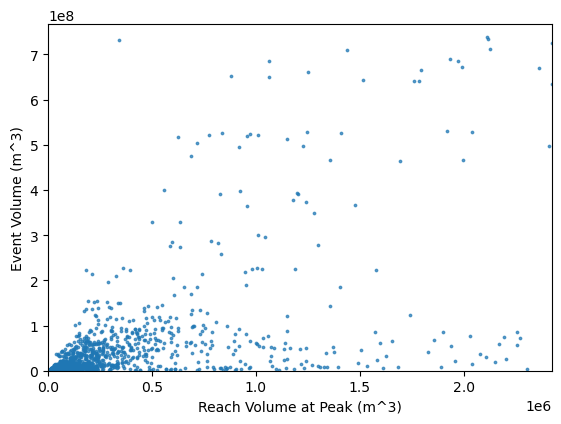

In [23]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))
x = df['Q100_Medium_vol_sec']
y = df['Q100_Medium_event_volume']
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]
p90y = np.percentile(y, 95)
p90x = np.percentile(x, 95)
ax.scatter(x, y, alpha=0.7, s=3)
ax.set_xlabel('Reach Volume at Peak (m^3)')
ax.set_ylabel('Event Volume (m^3)')
ax.set_xlim(0, p90x)
ax.set_ylim(0, p90y)